# Objective:
# Perform EDA to explore, visualize, and summarize insights from the Titanic dataset.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set visualization style
sns.set(style="whitegrid")

In [3]:
#Load Dataset
Titanic_dataset = pd.read_csv(r"D:\Internship_work\Task_5_271025\Titanic_dataset.csv")

In [4]:
# Basic Exploration
print("\nDataset Shape:", Titanic_dataset.shape)
print("\nData Information:")
print(Titanic_dataset.info())


Dataset Shape: (891, 12)

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print("\nStatistical Summary:")
print(Titanic_dataset.describe(include='all'))


Statistical Summary:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   7

In [6]:
print("\nMissing Values:")
print(Titanic_dataset.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Value counts for categorical features
cat_cols = Titanic_dataset.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\nValue Counts for {col}:")
    print(Titanic_dataset[col].value_counts())


Value Counts for Name:
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

Value Counts for Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Value Counts for Ticket:
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877         

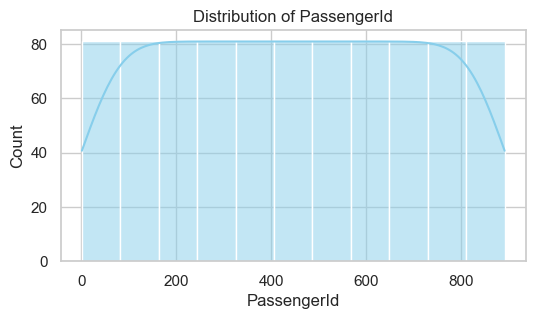

Observation: The distribution of PassengerId shows...


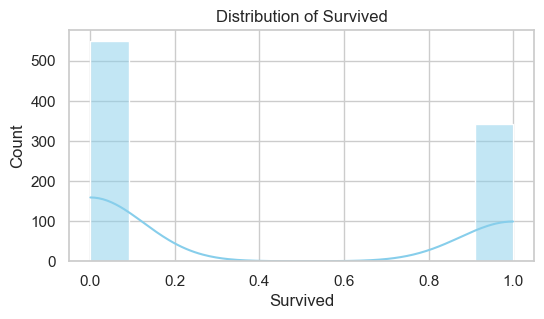

Observation: The distribution of Survived shows...


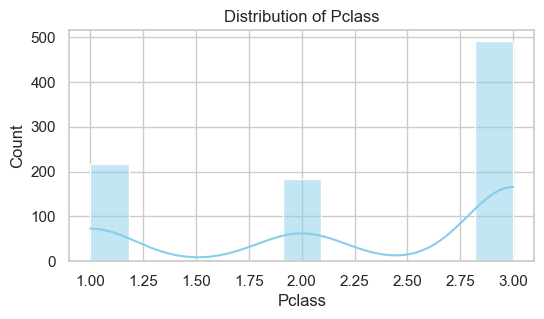

Observation: The distribution of Pclass shows...


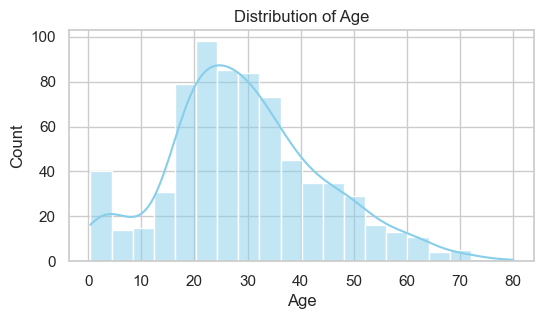

Observation: The distribution of Age shows...


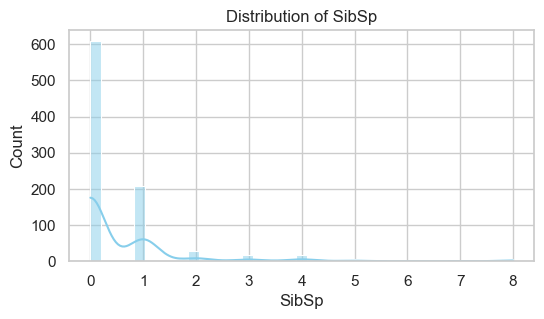

Observation: The distribution of SibSp shows...


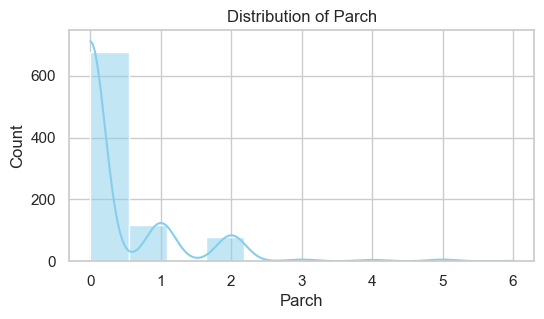

Observation: The distribution of Parch shows...


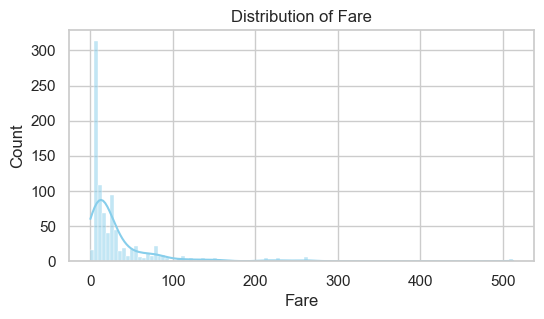

Observation: The distribution of Fare shows...


In [8]:
# Univariate Analysis
# Histograms - Distribution of Numerical Columns
num_cols = Titanic_dataset.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(Titanic_dataset[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()
    print(f"Observation: The distribution of {col} shows...")

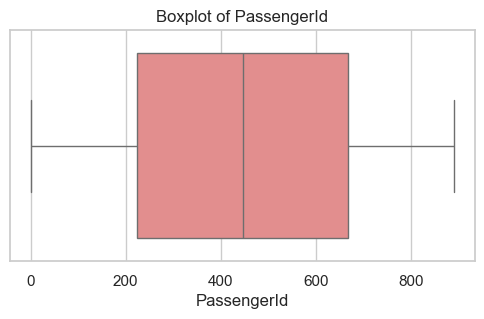

Observation: The boxplot of PassengerId indicates...


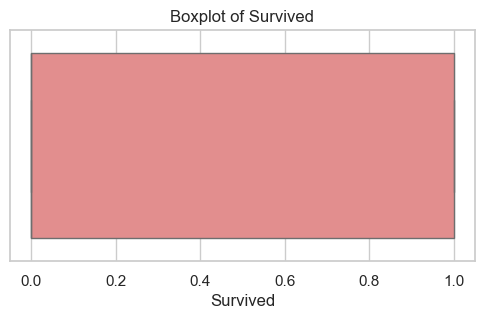

Observation: The boxplot of Survived indicates...


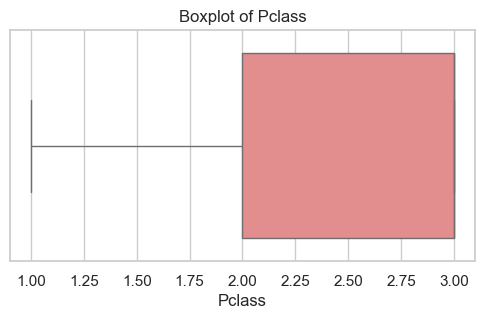

Observation: The boxplot of Pclass indicates...


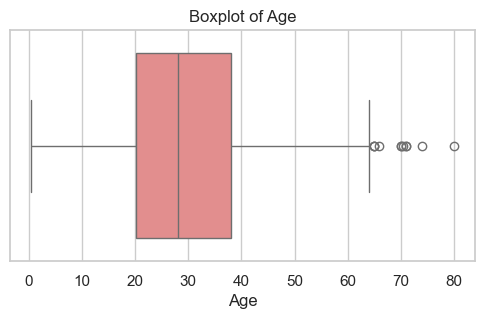

Observation: The boxplot of Age indicates...


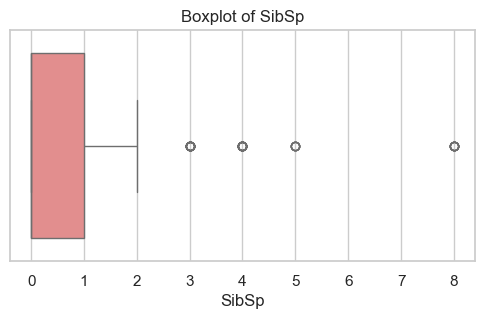

Observation: The boxplot of SibSp indicates...


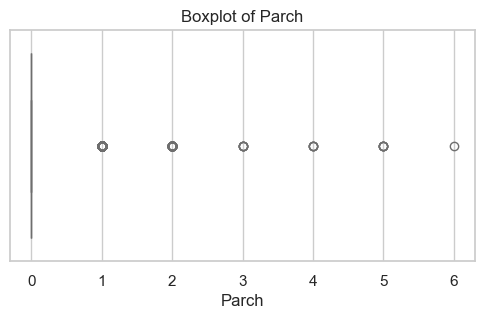

Observation: The boxplot of Parch indicates...


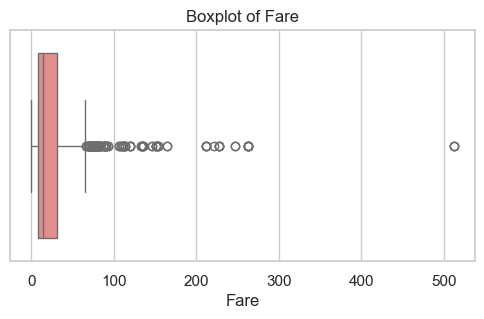

Observation: The boxplot of Fare indicates...


In [9]:
# Boxplots - Outlier Detection
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=Titanic_dataset[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
    plt.show()
    print(f"Observation: The boxplot of {col} indicates...")

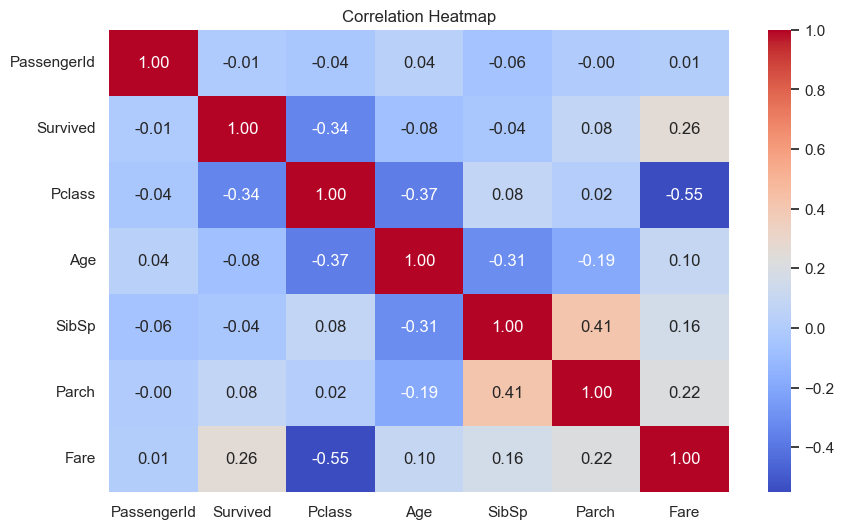

Observation: The heatmap shows correlations between numerical features.


In [10]:
# Bivariate Analysis
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(Titanic_dataset.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
print("Observation: The heatmap shows correlations between numerical features.")

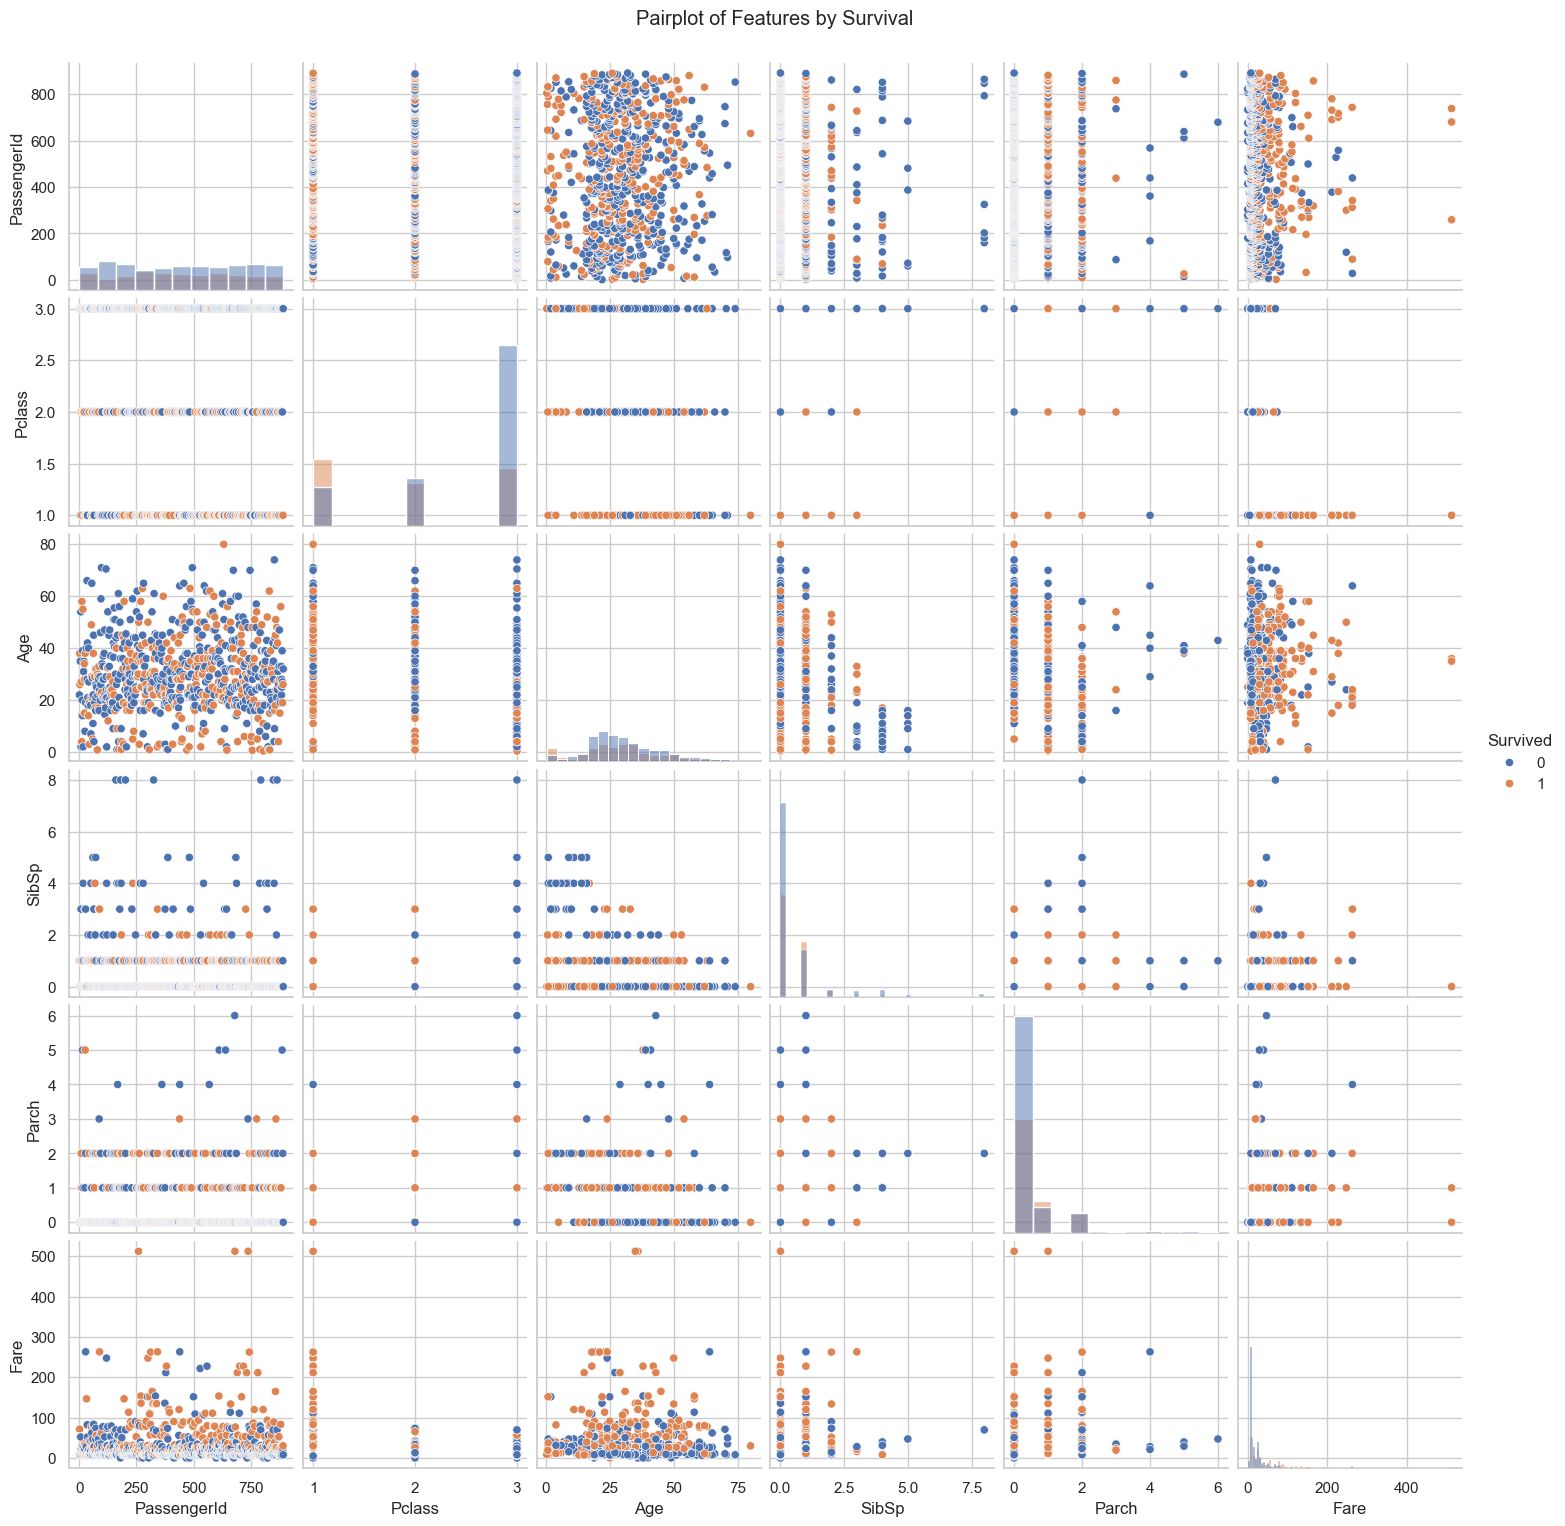

In [11]:
# Pairplot - Relationships between Variables
sns.pairplot(Titanic_dataset, hue='Survived', diag_kind='hist')
plt.suptitle('Pairplot of Features by Survival', y=1.02)
plt.show()

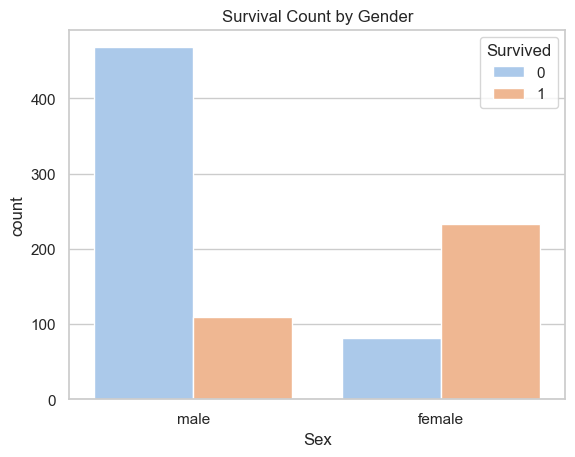

Observation: Females had a higher survival rate compared to males.


In [12]:
# Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=Titanic_dataset, palette='pastel')
plt.title('Survival Count by Gender')
plt.show()
print("Observation: Females had a higher survival rate compared to males.")

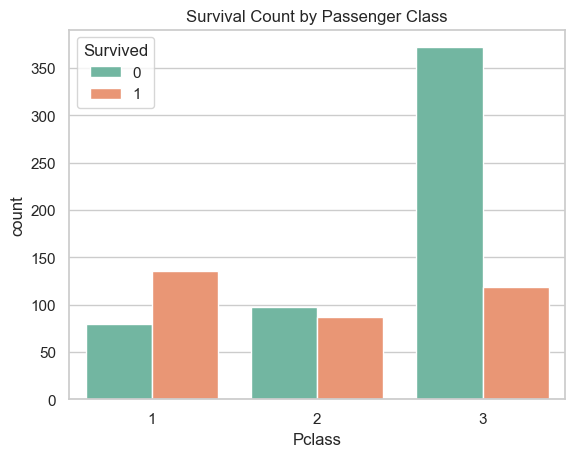

Observation: Passengers in higher classes had better survival chances.


In [13]:
# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=Titanic_dataset, palette='Set2')
plt.title('Survival Count by Passenger Class')
plt.show()
print("Observation: Passengers in higher classes had better survival chances.")

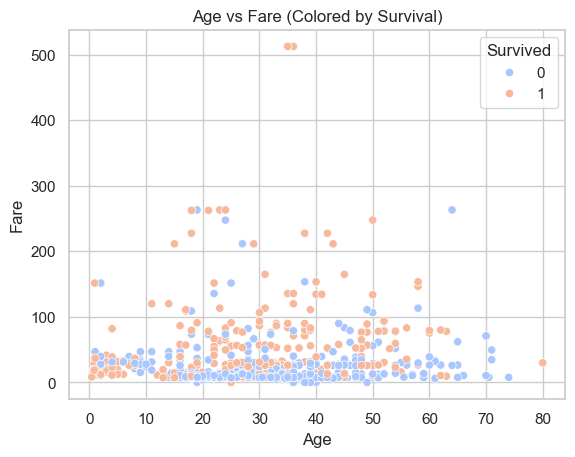

Observation: Younger passengers with higher fares tended to survive more.


In [14]:
# Age vs Fare Scatterplot
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=Titanic_dataset, palette='coolwarm')
plt.title('Age vs Fare (Colored by Survival)')
plt.show()
print("Observation: Younger passengers with higher fares tended to survive more.")

C:\Users\sourb\AppData\Local\Temp\ipykernel_22792\3211871410.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=Titanic_dataset, estimator=np.mean, palette='Blues')


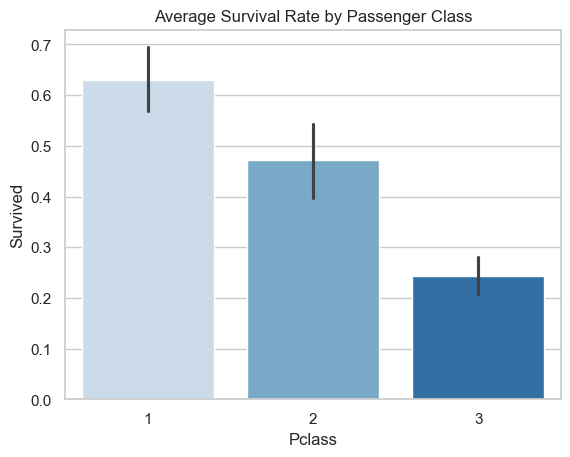

C:\Users\sourb\AppData\Local\Temp\ipykernel_22792\3211871410.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=Titanic_dataset, estimator=np.mean, palette='Greens')


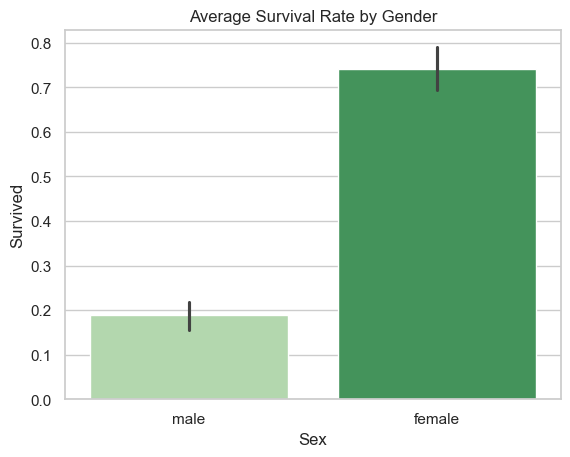

In [15]:
# Relationships and Trends
# Example trend plots
sns.barplot(x='Pclass', y='Survived', data=Titanic_dataset, estimator=np.mean, palette='Blues')
plt.title('Average Survival Rate by Passenger Class')
plt.show()


sns.barplot(x='Sex', y='Survived', data=Titanic_dataset, estimator=np.mean, palette='Greens')
plt.title('Average Survival Rate by Gender')
plt.show()

In [16]:
# Summary of Findings
print("\nSummary of EDA Findings:")
print("1. Dataset contains", Titanic_dataset.shape[0], "rows and", Titanic_dataset.shape[1], "columns.")
print("2. Missing values exist in columns such as Age and Cabin.")
print("3. Females and 1st class passengers had higher survival rates.")
print("4. Fare and Pclass are correlated with survival outcome.")
print("5. Younger passengers tended to survive more frequently.")
print("6. Data is ready for preprocessing and modeling.")


Summary of EDA Findings:
1. Dataset contains 891 rows and 12 columns.
2. Missing values exist in columns such as Age and Cabin.
3. Females and 1st class passengers had higher survival rates.
4. Fare and Pclass are correlated with survival outcome.
5. Younger passengers tended to survive more frequently.
6. Data is ready for preprocessing and modeling.
